<h2>EARTH QUAKE ANALYSIS</h2>

In the project, we will explore the activity of the significant earthquakes from the last 50 years. We'll use the data collected from the National Earthquake Information Center (NEIC) around the planet. We understand that an earthquake reaches the category of "Severely Affected" if its magnitude exceeds a grade of 8.

Data Exploration
- Mapping all the affected areas
- Number of occurrences of earthquake with different magnitude ranges
- Severity of an earthquake
- Mapping Highly affected areas based on Magnitude
- Correlation between Magnitude vs Depth
- Which month has highest earthquake occurrences?
- Which year has highest earthquake occurrences?

Prediction
- Performing Linear Regression.
- Explains why Linear Regression is not appropriate for this particular data set.
- Depth and Magnitude are not related linearly
- The dataset has to be predicted through other Non Linear Regression algorithms.

- Matplotlib: Its a plotting library 
- Seaborn: Python visualization library 
- Basemap: Adds geographical projections. This library is used to plot coast lines, countries.
- We are ignoring the warning such as deprecated. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

- Setting Try Except

In [20]:
try:
    blitz_quake = pd.read_csv("C:/Users/Sruthi/Documents/Group Project/EarthQuake.csv")
    print("EarthQuake file loaded successfully")
except:
    print("EarthQuake file not loaded successfully")

EarthQuake file loaded successfully


In [21]:
blitz_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [22]:
blitz_quake.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [23]:
blitz = blitz_quake[["Date","Latitude","Longitude","Magnitude","Depth","Type"]]

- Converting the string to datetime data type
- In the following sections we are retrieving the month and year to display the plots.

In [24]:
blitz["Date"] = pd.to_datetime(blitz["Date"])

In [25]:
blitz.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,1965-01-02,19.246,145.616,6.0,131.6,Earthquake
1,1965-01-04,1.863,127.352,5.8,80.0,Earthquake
2,1965-01-05,-20.579,-173.972,6.2,20.0,Earthquake
3,1965-01-08,-59.076,-23.557,5.8,15.0,Earthquake
4,1965-01-09,11.938,126.427,5.8,15.0,Earthquake


In [26]:
blitz.shape

(23412, 6)

Pivot Tables allows you to extract details from large data set. 

In [27]:
blitz.pivot_table(index = "Type", values = "Magnitude", aggfunc=len)

Type
Earthquake           23232.0
Explosion                4.0
Nuclear Explosion      175.0
Rock Burst               1.0
Name: Magnitude, dtype: float64

Basemap is a great tool for creating maps using python in a simple way. It's a matplotlib extension, so it has got all its features to create data visualizations, and adds the geographical projections and some datasets to be able to plot coast lines, countries, and so on directly from the library.

Projection: 'mill'(Miller Cylindrical), Default is cyl (Cylindrical Equidistant)

- llcrnrlon	The lower left corner geographical longitude
- llcrnrlat	The lower left corner geographical latitude
- urcrnrlon	The upper right corner geographical longitude
- urcrnrlat	The upper right corner geographical latitude

Resolution: 'Crude' 

Creating an Instance of the Basemap class

Miller's projection is used.Miller's projection is obtained by projecting all the points of the surface of the earth onto a cylinder. Once the earth is projected onto a cylinder it can be unrolled onto a plane.

In [28]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,resolution='c')

Basemap object converts lon/lat (in degrees) to x/y map projection coordinates.

The latitudes and longitudes are made into a list. The basemap object is passed on with arguments latitude and longitude to get the x and y coordinates.

In [29]:
longitudes = blitz["Longitude"].tolist()
latitudes = blitz["Latitude"].tolist()
x,y = m(longitudes,latitudes)

The plotted dots are the locations where earthquakes and explosions happened from 1965 to 2016

Figure: Used to change the size of the figures drawn. 
Creates an inch-by-inch image, which will be 80-by-80 pixels.
The x,y coordinates are given as input to the plot function.


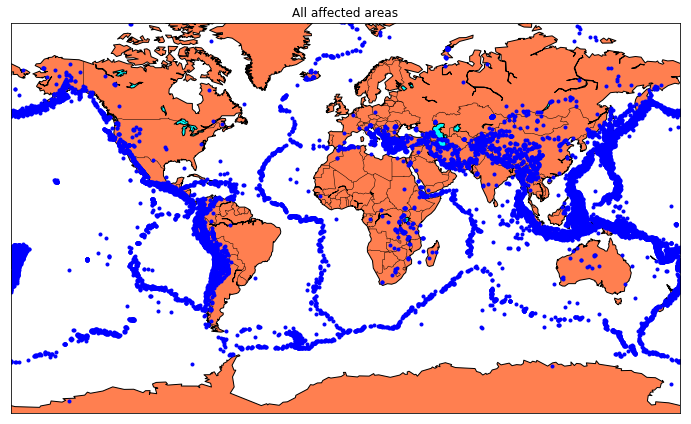

In [30]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries()
plt.show()

aeqd: Azimuthal Equidistant Projection

In [31]:
m1 = Basemap(projection='aeqd', lon_0 = 0, lat_0 = 0)

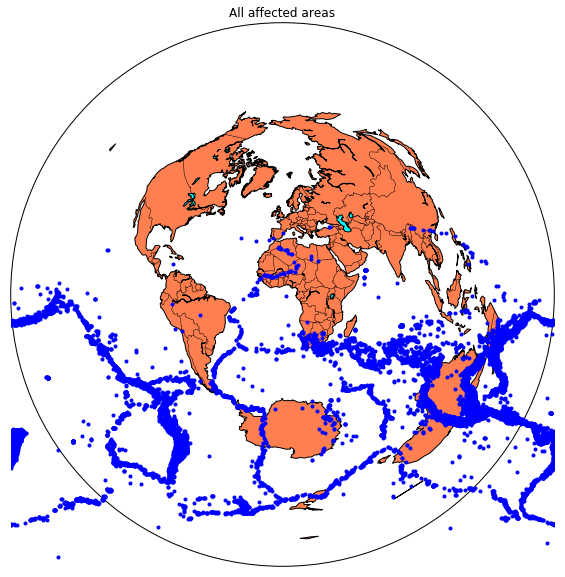

In [32]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m1.plot(x, y, "o", markersize = 3, color = 'blue')
m1.drawcoastlines()
m1.fillcontinents(color='coral',lake_color='aqua')
m1.drawcountries()
plt.show()

In [33]:
minimum = blitz["Magnitude"].min()
maximum = blitz["Magnitude"].max()
average = blitz["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', 5.5)
('Maximum:', 9.0999999999999996)
('Mean', 5.882530753460003)


- n is the number of occurances in each bin. 
- hist is a function of pyplot library
- The bins parameter specifies the number of bins the data will be divided into. 
- In the below configuration: each bin size is 1.

Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


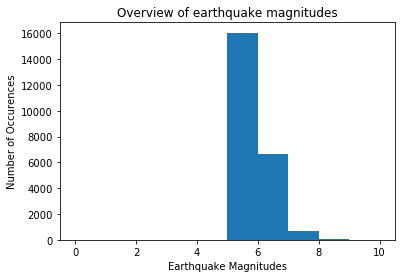

In [34]:
(n,bins, patches) = plt.hist(blitz["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

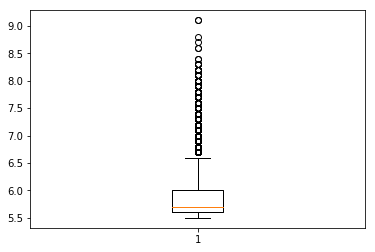

In [36]:
plt.boxplot(blitz["Magnitude"])
plt.show()

In [37]:
highly_affected = blitz[blitz["Magnitude"]>=8]

In [38]:
print(highly_affected.shape)

(40, 6)


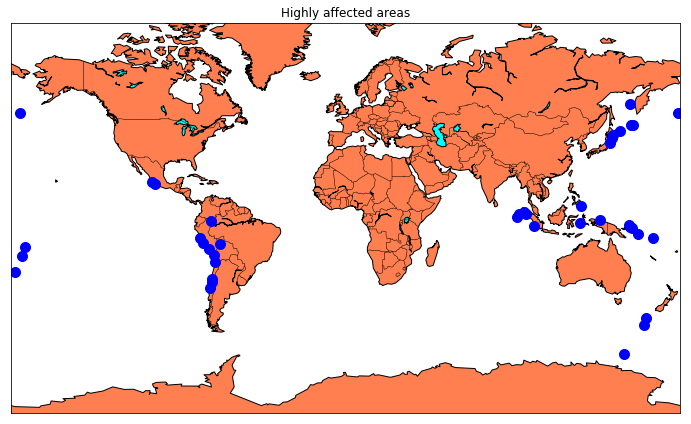

In [39]:
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawcountries()
plt.show()

In [40]:
blitz["Month"] = blitz['Date'].dt.month

The index level of pandas starts from 1. month_occurence[1] gives the 1st month data

In [42]:
month_occurrence = blitz.groupby("Month").groups
print(len(month_occurrence[1]))

occurrence = []

for i in range(1,13):
    val = month_occurrence[i]
    occurrence.append(len(val))

print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


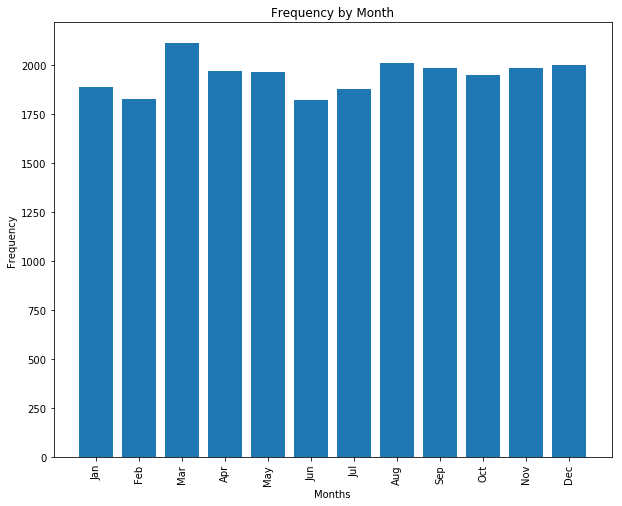

In [43]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12)

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0,12)
ax.set_xticks(tick_positions)
ax.set_xticklabels(months, rotation = 90)
plt.title("Frequency by Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

In [44]:
blitz["Year"] = blitz['Date'].dt.year

('Year with minimum earthquakes', 1966)
('Year with maximum earthquakes', 2011)
('Maximum', 713)
('Minimum', 234)


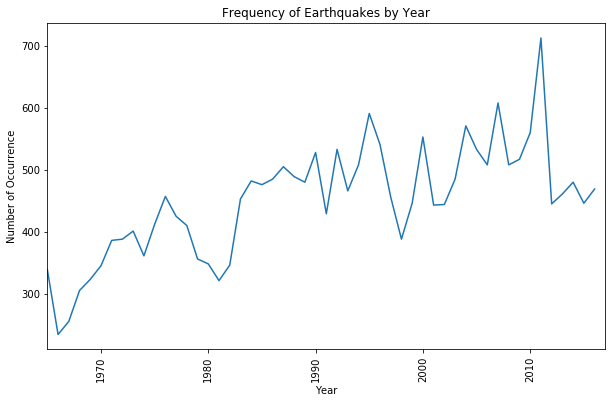

In [45]:
year_occurrence = blitz.groupby("Year").groups

year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)

for i in range(len(year)):
    if(len(year_occurrence[year[i]]) == maximum):
        print("Year with maximum earthquakes", year[i])
    
    elif(len(year_occurrence[year[i]]) == minimum):
        print("Year with minimum earthquakes", year[i])
    

print("Maximum",maximum)
print("Minimum",minimum)

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2017)
plt.show()

<b>Correlation between Depth & Magnitude<b>

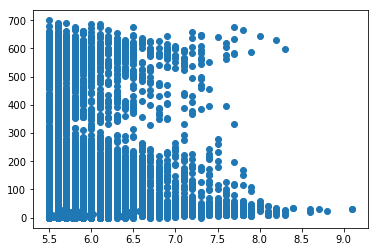

In [46]:
plt.scatter(blitz["Magnitude"],blitz["Depth"])

In [47]:
np.corrcoef(blitz["Magnitude"], blitz["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])

- Linear regression is an approach for modeling the relationship between a scalar dependent variable y (Magnitude) and one or   more explanatory variables (or independent variables) denoted X (Depth).
- Using an independent variable (Depth) we are trying to predict the dependent variable (Magnitude).
- Based on Magnitude we are trying to predict Depth.


<b>Linear Regression<b>

In [48]:
blitz

,Date,Latitude,Longitude,Magnitude,Depth,Type,Month,Year
0,1965-01-02,19.2460,145.6160,6.0,131.60,Earthquake,1,1965
1,1965-01-04,1.8630,127.3520,5.8,80.00,Earthquake,1,1965
2,1965-01-05,-20.5790,-173.9720,6.2,20.00,Earthquake,1,1965
3,1965-01-08,-59.0760,-23.5570,5.8,15.00,Earthquake,1,1965
4,1965-01-09,11.9380,126.4270,5.8,15.00,Earthquake,1,1965
5,1965-01-10,-13.4050,166.6290,6.7,35.00,Earthquake,1,1965
6,1965-01-12,27.3570,87.8670,5.9,20.00,Earthquake,1,1965
7,1965-01-15,-13.3090,166.2120,6.0,35.00,Earthquake,1,1965
8,1965-01-16,-56.4520,-27.0430,6.0,95.00,Earthquake,1,1965
9,1965-01-17,-24.5630,178.4870,5.8,565.00,Earthquake,1,1965


Drop NaN elements from the pandas dataframe

In [49]:
blitz_notnull = blitz.dropna()

In [50]:
blitz_notnull

,Date,Latitude,Longitude,Magnitude,Depth,Type,Month,Year
0,1965-01-02,19.2460,145.6160,6.0,131.60,Earthquake,1,1965
1,1965-01-04,1.8630,127.3520,5.8,80.00,Earthquake,1,1965
2,1965-01-05,-20.5790,-173.9720,6.2,20.00,Earthquake,1,1965
3,1965-01-08,-59.0760,-23.5570,5.8,15.00,Earthquake,1,1965
4,1965-01-09,11.9380,126.4270,5.8,15.00,Earthquake,1,1965
5,1965-01-10,-13.4050,166.6290,6.7,35.00,Earthquake,1,1965
6,1965-01-12,27.3570,87.8670,5.9,20.00,Earthquake,1,1965
7,1965-01-15,-13.3090,166.2120,6.0,35.00,Earthquake,1,1965
8,1965-01-16,-56.4520,-27.0430,6.0,95.00,Earthquake,1,1965
9,1965-01-17,-24.5630,178.4870,5.8,565.00,Earthquake,1,1965


<b>Loading the libraries and performing Linear Regression<b>

- Magnitude as a function of Depth
- Depth is independent variable
- Magnitude is dependent variable
- Performing Linear Regression using scikit learn (Python Module)
- Class: Skylearn.linear_model, Function: LinearRegression()
- fit(X,Y): X -> Accepts numpy array or sparse matrix of shape(number of samples, features)

- Linear_Model is a class
- LinearRegression() function
- regr is an instance of the Linear_Model class
- reshape --> Gives a new shape to an array without changing its data.
- Fit command is used to fit a linear regression model to the data.
- Scikit learn after a version it is not accepting a one dimensional array. So we have to convert the data to matrix which has 1 column and n rows.

In [61]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

X=blitz_notnull['Depth'].values[1:1000]
Y=blitz_notnull['Magnitude'].values[1:1000]

X1 = X.reshape(len(X),1)
Y1 = Y.reshape(len(Y),1)

regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>The Coefficients<b>

In [62]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[ 0.00021626]]))


For every value of X the Y value is predicted

In [63]:
Y2 = regr.predict(X1)

Y2 is an array of predicted magnitude values

- Y2 is the predicted Value
- Y is the original Value
- Difference between them is the error
- We are squaring the error and calculating the mean

In [64]:
print("Mean squared error: %.2f"
      % np.mean((Y2 - Y1) ** 2))

Mean squared error: 0.20


- Plot draws the regression line
- Relationship is not linear for both the variables

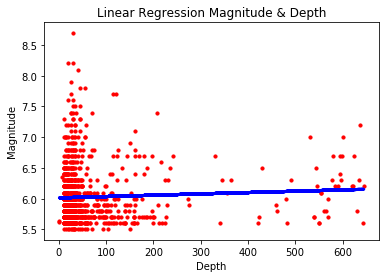

In [65]:
plt.scatter(X1, Y1, s = 10 ,color='red')
plt.plot(X1, Y2, color='blue',
         linewidth=3)

plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.title("Linear Regression Magnitude & Depth")

Inference: Magnitude does not have a linear relationship with depth.

In [67]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

<b>R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.

Best possible score is 1.0 and it can be negative.<b>

In [68]:
print "r-squared:", r_value**2

r-squared: 0.00276549553268
